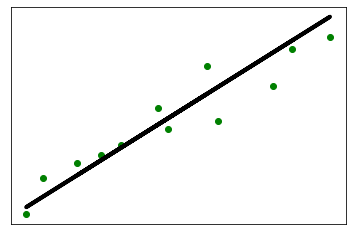

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [9]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Input file containing data
input_file = 'data_singlevar_regr.txt'

# It's a comma-separated file, so we can easily load it using a one-line function call:
# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# split it into training and testing
# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# create a linear regressor object and train it using the training data
# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = regressor.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute the performance metrics for the regressor by comparing the ground truth, which
# refers to the actual outputs, with the predicted outputs:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test,y_test_pred), 2))

print("Mean squared error =", round(sm.mean_squared_error(y_test,y_test_pred), 2))

print("Median absolute error =", round(sm.median_absolute_error(y_test,y_test_pred), 2))

print("Explain variance score =", round(sm.explained_variance_score(y_test,y_test_pred), 2))

print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# Once the model has been created, we can save it into a file so that we can use it later. Python
# provides a nice module called pickle that enables us to do this:
# Model persistence
output_model_file = 'model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
# Let's load the model from the file on the disk and perform prediction:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)
    
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test,
y_test_pred_new), 2))